# Towards Realistic and Trustworthy Super-Resolution for Multispectral Remote Sensing Images

<div align="center">
  
  <!-- Institution Logos -->
  <img src="https://web.gcompostela.org/wp-content/uploads/2019/02/University-of-Valencia.png" height="60" alt="University of Valencia">
  &nbsp;&nbsp;&nbsp;&nbsp;
  <img src="https://iadf-school.org/wp-content/uploads/2022/09/logo_iadfschool.png" height="60" alt="IADF School">
  &nbsp;&nbsp;&nbsp;&nbsp;
  <img src="https://isp.uv.es/images/IPL_logo_blanco.webp" height="60" alt="IPL">
  &nbsp;&nbsp;&nbsp;&nbsp;
  <img src="https://isp.uv.es/images/logo_isp.svg" height="60" alt="ISP">
  <br>
  
  <!-- Colab Badge -->
  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ipl-uv/iadfschool25tutorial/tutorial02.ipynb)
</div>

<p align="center">
  <img src="https://cdn-uploads.huggingface.co/production/uploads/6402474cfa1acad600659e92/G1o2oiRwJaqw4ZP9nG0NO.webp" width="100%">
</p>
</p>

<p align="center">
   <em>SEN2SR is a Python package for enhancing the spatial resolution of Sentinel-2 satellite images up to 2.5 meters</em> 🚀
</p>


<p align="center">
<a href='https://pypi.python.org/pypi/sen2sr'>
    <img src='https://img.shields.io/pypi/v/sen2sr.svg' alt='PyPI' />
</a>
<a href="https://opensource.org/licenses/MIT" target="_blank">
    <img src="https://img.shields.io/badge/License-MIT-blue.svg" alt="License">
</a>
<a href="https://github.com/psf/black" target="_blank">
    <img src="https://img.shields.io/badge/code%20style-black-000000.svg" alt="Black">
</a>
<a href="https://pycqa.github.io/isort/" target="_blank">
    <img src="https://img.shields.io/badge/%20imports-isort-%231674b1?style=flat&labelColor=ef8336" alt="isort">
</a>
<a href="https://colab.research.google.com/drive/1x65GoI5hOfgX61LhtbATSBm7HySUHSw9?usp=sharing" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
</p>



---

## **Tutorial 2: Inference**

Welcome to Tutorial 2! In this hands-on session, you'll learn how to use the SEN2SRLite model for enhancing Sentinel-2 satellite imagery from 10m and 20m resolution to 2.5m resolution. This tutorial focuses on practical inference techniques using pre-trained models to achieve realistic super-resolution of multispectral remote sensing data.

**What You'll Learn**

- 🛰️ Data Access: Creating Sentinel-2 L2A data cubes using the cubo library for any region and time period
- 🔍 Model Usage: Loading and applying the pre-trained SEN2SRLite model via mlstac for instant super-resolution
- 📊 Multi-resolution Processing: Working with mixed 10m and 20m Sentinel-2 bands to generate 2.5m enhanced imagery
- 🎨 Visualization: Comparing original RGB composites with super-resolved results to assess enhancement quality
- ⚡ Efficient Inference: Optimizing model performance for real-world applications and large-scale processing
- 🌍 Real Applications: Applying super-resolution to various Earth observation tasks like urban monitoring, agriculture, and environmental studies

**Key Features**

- Pre-trained Models: No training required - use ready-to-deploy SEN2SRLite models
- Easy Integration: Simple Python API for seamless integration into existing workflows
- Multi-spectral Enhancement: Preserve spectral information while enhancing spatial resolution
- Scalable Processing: Efficient inference pipeline suitable for operational use

This tutorial demonstrates the complete workflow from data acquisition to super-resolution inference, showing how to transform standard Sentinel-2 imagery into high-resolution products suitable for detailed analysis and applications.

Available Models:

- **SEN2SR:** https://github.com/ESAOpenSR/SEN2SR
- **SEN2SRLite:** https://github.com/ESAOpenSR/SEN2SR
- **OpenSR-Model:** https://github.com/ESAOpenSR/opensr-model

**More information at https://opensr.eu/**


## **SEN2SRLite: From 10m and 20m Sentinel-2 bands to 2.5m**


This example demonstrates the use of the `SEN2SRLite` model to enhance the spatial resolution of Sentinel-2 imagery. A
Sentinel-2 L2A data cube is created over a specified region and time range using the cubo library, including both 10 m
and 20 m bands. The pretrained model, downloaded via mlstac, takes a single normalized sample as input and predicts a
HR output. The visualization compares the original RGB composite to the super-resolved result.


In [1]:
!pip install sen2sr mlstac git+https://github.com/ESDS-Leipzig/cubo.git -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 104.3 MB/s eta 0:00:00


In [2]:
LATITUDE = 39.49152740347753
LONGITUDE = -0.4308725142800361
START_DATE = "2023-01-01"
END_DATE = "2023-12-31"

# In the START_DATE & END_DATE range, there can be multiple images. This index is used to select one of them.
IMAGE_INDEX = 1

In [3]:
import mlstac
import torch
import cubo

# Download the model
mlstac.download(
  file="https://huggingface.co/tacofoundation/sen2sr/resolve/main/SEN2SRLite/main/mlm.json",
  output_dir="model/SEN2SRLite",
)

# Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = mlstac.load("model/SEN2SRLite").compiled_model(device=device)
model = model.to(device)

In [4]:
# Create a Sentinel-2 L2A data cube for a specific location and date range
da = cubo.create(
    lat=LATITUDE,
    lon=LONGITUDE,
    collection="sentinel-2-l2a",
    bands=["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"],
    start_date=START_DATE,
    end_date=END_DATE,
    edge_size=128,
    resolution=10
)

# Prepare the data to be used in the model, select just one sample
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
original_s2_numpy = (da[IMAGE_INDEX].compute().to_numpy() / 10_000).astype("float32")
X = torch.from_numpy(original_s2_numpy).float().to(device)

# Apply model
superX = model(X[None]).squeeze(0)

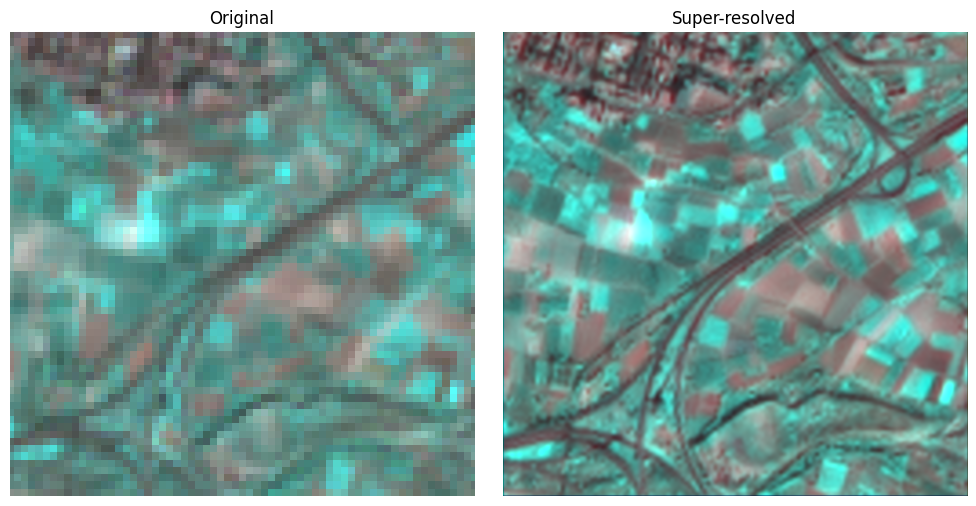

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

lr = slice(0, 128)
hr = slice(lr.start*4, lr.stop*4)

# Original
axes[0].imshow(X[[9, 7, 5], lr, lr].permute(1, 2, 0).cpu().numpy() * 1.5)
axes[0].set_title("Original")
axes[0].axis('off')

# Improvement
axes[1].imshow(superX[[9, 7, 5], hr, hr].permute(1, 2, 0).cpu().numpy() * 1.5)
axes[1].set_title("Super-resolved")
axes[1].axis('off')

plt.tight_layout()

## **Valencia Dana Flood Analysis**

This section demonstrates how to use super-resolution for disaster monitoring and flood analysis. We'll apply the SEN2SRLite model to enhance Sentinel-2 imagery of Valencia during and after the Dana flood events, showing how higher resolution imagery can improve flood detection and damage assessment.


In [24]:
#@title **Auxiliar functions**
def create_datacube(lat, lon, start_date, end_date, edge_size=384):
    """Create larger Sentinel-2 data cube"""
    try:
        da = cubo.create(
            lat=lat, lon=lon,
            collection="sentinel-2-l2a",
            bands=["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B11", "B12"],
            start_date=start_date, end_date=end_date,
            edge_size=edge_size, resolution=10
        )
        return da
    except Exception as e:
        print(f"Error creating datacube: {e}")
        return None

def process_large_imagery(da, model, device, period_name):
    """Process large imagery using sen2sr.predict_large"""
    if da is None or len(da) == 0:
        print(f"No imagery found for {period_name}")
        return None, None

    try:
        # Process the first available image
        image_data = (da[0].compute().to_numpy() / 10_000).astype("float32")
        X = torch.from_numpy(image_data).float().to(device)
        X = torch.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

        print(f"Processing {period_name} image with shape: {X.shape}")

        # Use sen2sr.predict_large for large image processing
        with torch.no_grad():
            super_resolved = sen2sr.predict_large(
                model=model,
                X=X,
                overlap=32  # 32-pixel overlap to avoid artifacts
            )

        print(f"Super-resolved {period_name} shape: {super_resolved.shape}")
        return X, super_resolved

    except Exception as e:
        print(f"Error processing {period_name}: {e}")
        return None, None

In [25]:
# Valencia Dana Flood Analysis - Using predict_large correctly
import sen2sr
import torch
import cubo
import matplotlib.pyplot as plt
import numpy as np

# Flood analysis parameters
VALENCIA_LAT = 39.421756
VALENCIA_LON = -0.363266
FLOOD_START = "2024-10-28"
FLOOD_END = "2024-11-06"
PRE_FLOOD_START = "2024-09-07"
PRE_FLOOD_END = "2024-09-30"


# Main processing
print("Creating large data cubes...")
pre_flood_da = create_datacube(VALENCIA_LAT, VALENCIA_LON, PRE_FLOOD_START, PRE_FLOOD_END, edge_size=512)
flood_da = create_datacube(VALENCIA_LAT, VALENCIA_LON, FLOOD_START, FLOOD_END, edge_size=512)

# Process large imagery
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pre_flood_orig, pre_flood_sr = process_large_imagery(pre_flood_da, model, device, "pre-flood")
flood_orig, flood_sr = process_large_imagery(flood_da, model, device, "flood period")

Creating large data cubes...
Processing pre-flood image with shape: torch.Size([10, 512, 512])


100%|██████████| 36/36 [00:02<00:00, 13.66it/s]


Super-resolved pre-flood shape: torch.Size([10, 2048, 2048])
Processing flood period image with shape: torch.Size([10, 512, 512])


100%|██████████| 36/36 [00:02<00:00, 12.23it/s]

Super-resolved flood period shape: torch.Size([10, 2048, 2048])


Original image size: torch.Size([10, 512, 512])
Super-resolved size: torch.Size([10, 2048, 2048])
Enhancement factor: 4x


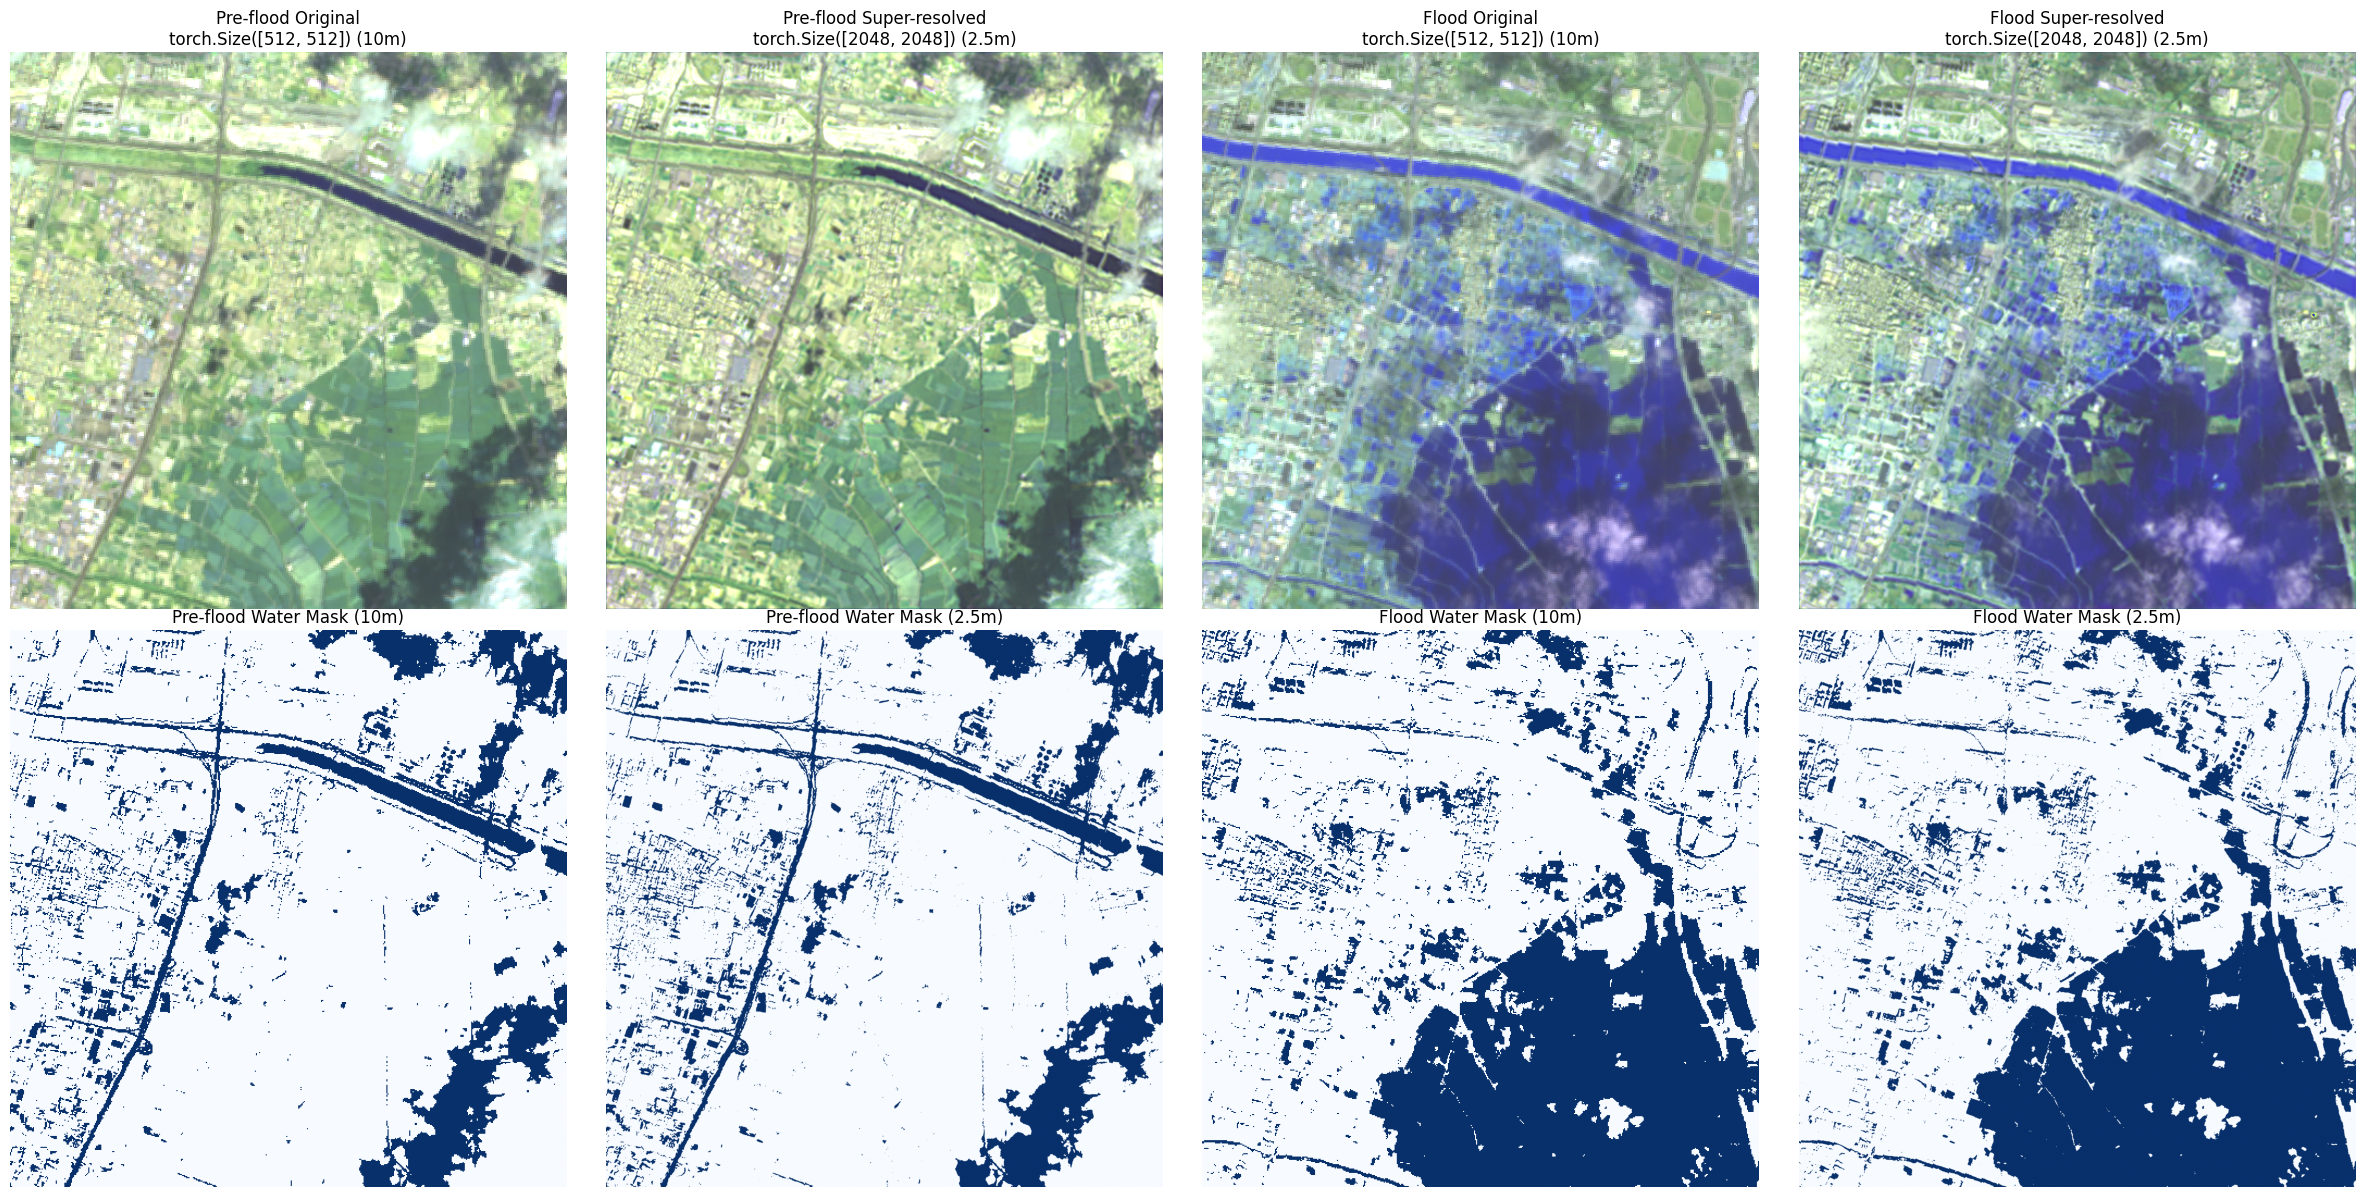

In [26]:
print(f"Original image size: {pre_flood_orig.shape}")
print(f"Super-resolved size: {pre_flood_sr.shape}")
print(f"Enhancement factor: {pre_flood_sr.shape[-1] // pre_flood_orig.shape[-1]}x")

# Visualization
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
rgb_bands = [9, 8, 3]

# Row 1: RGB comparisons
axes[0,0].imshow(pre_flood_orig[rgb_bands].permute(1, 2, 0).cpu().numpy() * 2)
axes[0,0].set_title(f"Pre-flood Original\n{pre_flood_orig.shape[-2:]} (10m)")
axes[0,0].axis('off')

axes[0,1].imshow(pre_flood_sr[rgb_bands].permute(1, 2, 0).cpu().numpy() * 2)
axes[0,1].set_title(f"Pre-flood Super-resolved\n{pre_flood_sr.shape[-2:]} (2.5m)")
axes[0,1].axis('off')

axes[0,2].imshow(flood_orig[rgb_bands].permute(1, 2, 0).cpu().numpy() * 2)
axes[0,2].set_title(f"Flood Original\n{flood_orig.shape[-2:]} (10m)")
axes[0,2].axis('off')

axes[0,3].imshow(flood_sr[rgb_bands].permute(1, 2, 0).cpu().numpy() * 2)
axes[0,3].set_title(f"Flood Super-resolved\n{flood_sr.shape[-2:]} (2.5m)")
axes[0,3].axis('off')

# Row 2: Water detection
nir_threshold = 0.30

pre_water_orig = pre_flood_orig[6] < nir_threshold
pre_water_sr = pre_flood_sr[6] < nir_threshold
flood_water_orig = flood_orig[6] < nir_threshold
flood_water_sr = flood_sr[6] < nir_threshold

axes[1,0].imshow(pre_water_orig.cpu().numpy(), cmap='Blues')
axes[1,0].set_title("Pre-flood Water Mask (10m)")
axes[1,0].axis('off')

axes[1,1].imshow(pre_water_sr.cpu().numpy(), cmap='Blues')
axes[1,1].set_title("Pre-flood Water Mask (2.5m)")
axes[1,1].axis('off')

axes[1,2].imshow(flood_water_orig.cpu().numpy(), cmap='Blues')
axes[1,2].set_title("Flood Water Mask (10m)")
axes[1,2].axis('off')

axes[1,3].imshow(flood_water_sr.cpu().numpy(), cmap='Blues')
axes[1,3].set_title("Flood Water Mask (2.5m)")
axes[1,3].axis('off')

plt.tight_layout()

## **Global Coverage: Super-Resolution Anywhere on Earth 🌍**

Think of any part of the planet - you can run super-resolution on Sentinel-2 imagery from anywhere on Earth! Simply change the coordinates below to process imagery from your region of interest - whether it's the Amazon, Tokyo, your hometown, or any location covered by Sentinel-2 missions.

In [28]:
# Example: Process imagery from a different location (e.g., Tokyo, Japan)
